In [89]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import fcluster

In [61]:
# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')  # Reemplaza con la ruta de tu archivo CSV

In [63]:
# Análisis Exploratorio de Datos (EDA)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [65]:
# Distribución de las variables
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


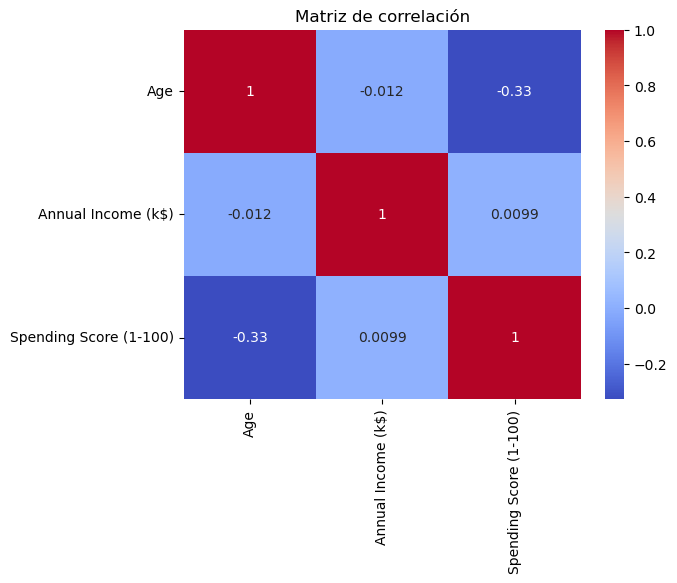

In [67]:
# Ver la correlación entre las variables
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

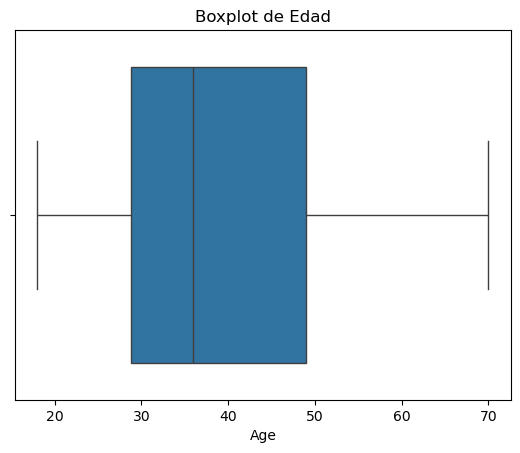

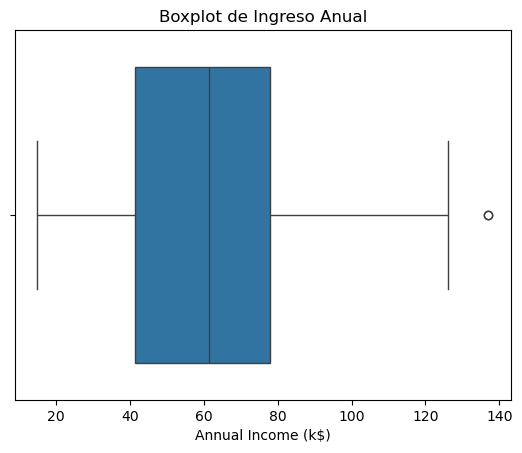

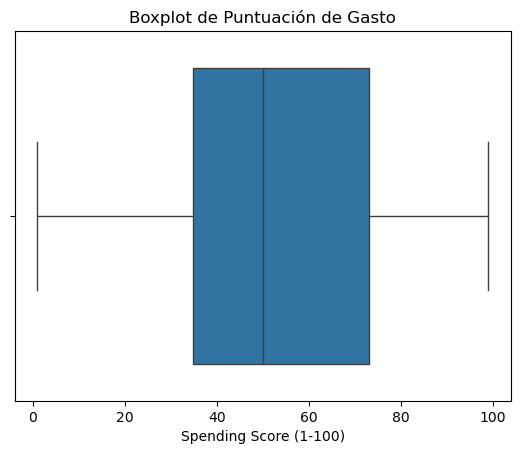

In [73]:
# Identificación de valores atípicos
sns.boxplot(x=df['Age'])
plt.title('Boxplot de Edad')
plt.show()

sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot de Ingreso Anual')
plt.show()

sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot de Puntuación de Gasto')
plt.show()


In [75]:
# Limpieza de Datos: Eliminar duplicados
df = df.drop_duplicates()

In [77]:
# Tratamiento de valores faltantes
# Imputación de valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = imputer.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [81]:
# Transformación de Datos: Normalizar o estandarizar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [83]:
# Selección de características: No se realiza filtrado en este caso ya que todas las variables parecen relevantes

In [85]:
# Clustering Jerárquico
# Realizar el linkage
linked = linkage(df_scaled, method='ward')  # Método 'ward' es el que minimiza la varianza dentro de los clústeres


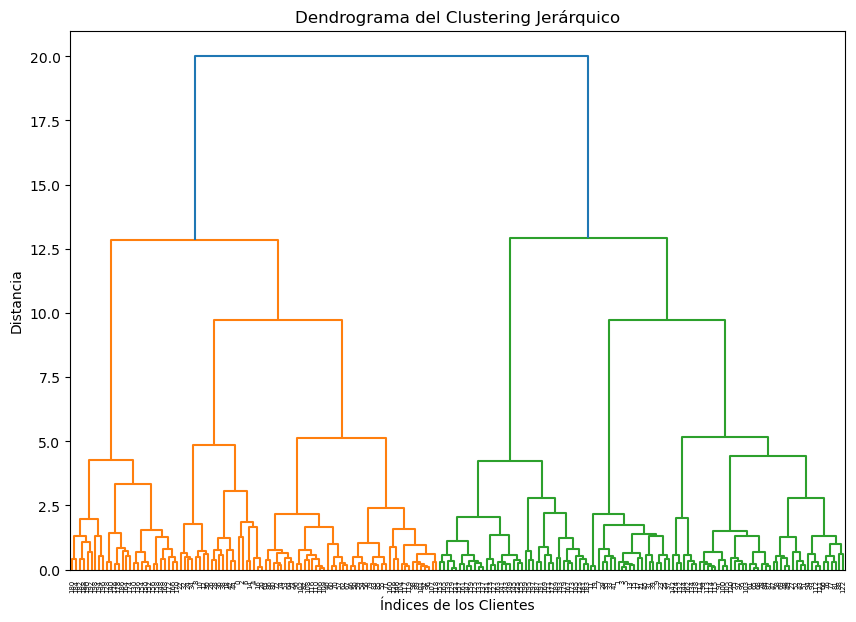

In [87]:
# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índices de los Clientes')
plt.ylabel('Distancia')
plt.show()

In [91]:
# Asignar etiquetas de cluster (ejemplo con k=5)
clusters = fcluster(linked, 5, criterion='maxclust')


In [93]:
# Añadir las etiquetas de cluster al dataframe
df['Cluster'] = clusters

In [95]:
# Evaluación del Desempeño del Modelo
# Calcular el coeficiente de Silhouette
sil_score = silhouette_score(df_scaled, clusters)
print(f"Coeficiente de Silhouette: {sil_score}")

Coeficiente de Silhouette: 0.39002826186267214


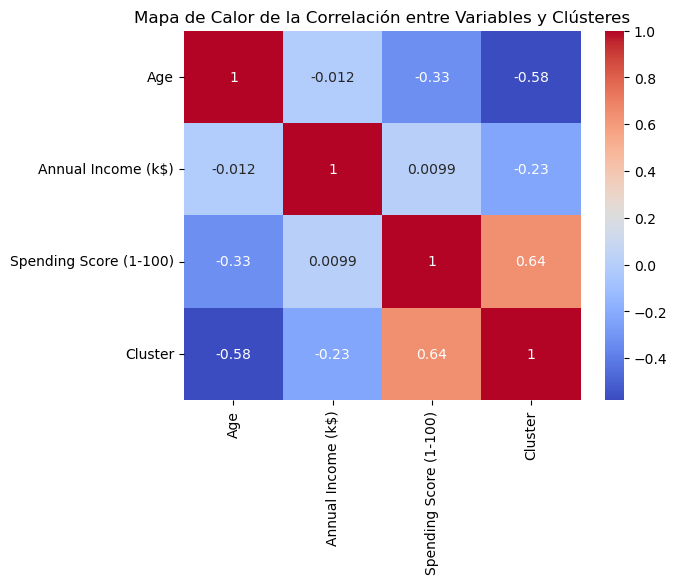

In [97]:
# Visualización de los resultados
# Mapa de calor de la matriz de distancia
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de la Correlación entre Variables y Clústeres")
plt.show()

In [103]:
# Interpretación y Documentación de los Resultados
# Ver las características medias de cada cluster
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Ver las características medias de cada cluster solo para las columnas numéricas
cluster_summary = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
1        169.214286  43.892857           91.285714               16.678571
2         22.181818  44.318182           25.772727               20.272727
3         86.666667  56.400000           55.288889               48.355556
4        162.000000  32.692308           86.538462               82.128205
5         70.545455  26.560606           47.363636               56.787879


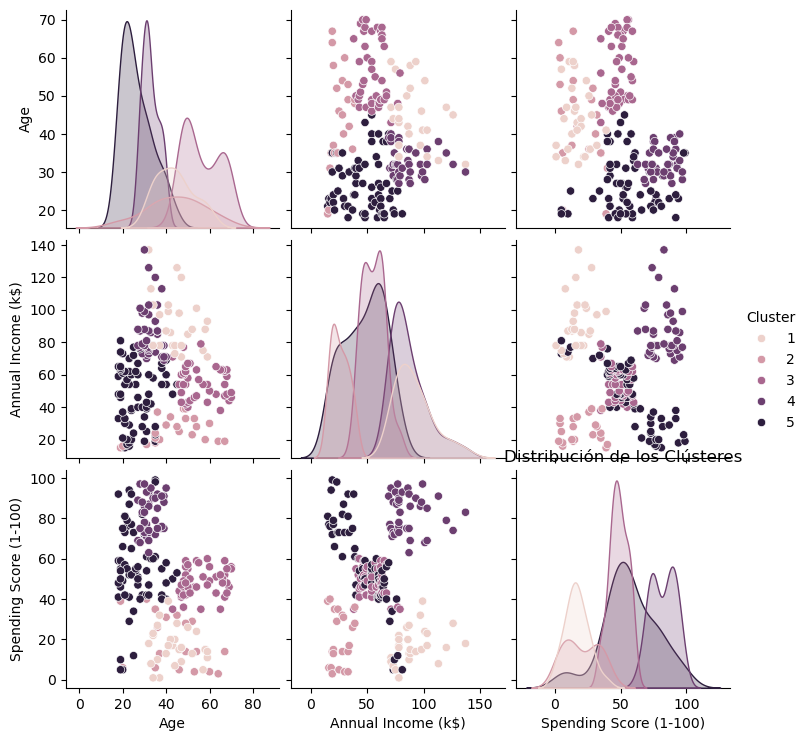

In [101]:
# Analizar la distribución de los clústeres por edad, ingreso anual y puntuación de gasto
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plt.title('Distribución de los Clústeres')
plt.show()